In [1]:
#importing necessarary libraries and reading csv file
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("survey_results_public.csv")


In [36]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [2]:
 #selecting attributes
df=df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df=df.rename({"ConvertedCompYearly":"Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master's degree (M.A., M.S., M.Eng., MBA, etc",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master's degree (M.A., M.S., M.Eng., MBA, etc",10,"Independent contractor, freelancer, or self-em...",NaN


In [3]:
# data cleaning - removing data with null values
df=df[df["Salary"].notnull()]
df=df[df["YearsCodePro"].notnull()]
df=df[df["Country"].notnull()]
df=df[df["EdLevel"].notnull()]
df=df[df["Employment"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
9,Sweden,"Master's degree (M.A., M.S., M.Eng., MBA, etc",4,Employed full-time,51552.0
11,Spain,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master's degree (M.A., M.S., M.Eng., MBA, etc",6,Employed full-time,77290.0
16,Turkey,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0


In [11]:
# information about attributes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46144 entries, 9 to 83438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46144 non-null  object 
 1   EdLevel       46144 non-null  object 
 2   YearsCodePro  46144 non-null  object 
 3   Employment    46144 non-null  object 
 4   Salary        46144 non-null  float64
 5   DevType       46144 non-null  object 
 6   Language      46144 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.8+ MB


In [4]:
#data cleaning 
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [5]:
df=df[df["Employment"]=="Employed full-time"]
df=df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [10]:
df["Country"].value_counts()

United States of America                                15288
India                                                   10511
Other                                                   10311
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Turkey  

In [6]:
def shorten_categories(categories, cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [7]:
# changing the country name to other whose developer/SD count is less than 400
country_map = shorten_categories(df.Country.value_counts(), 400)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

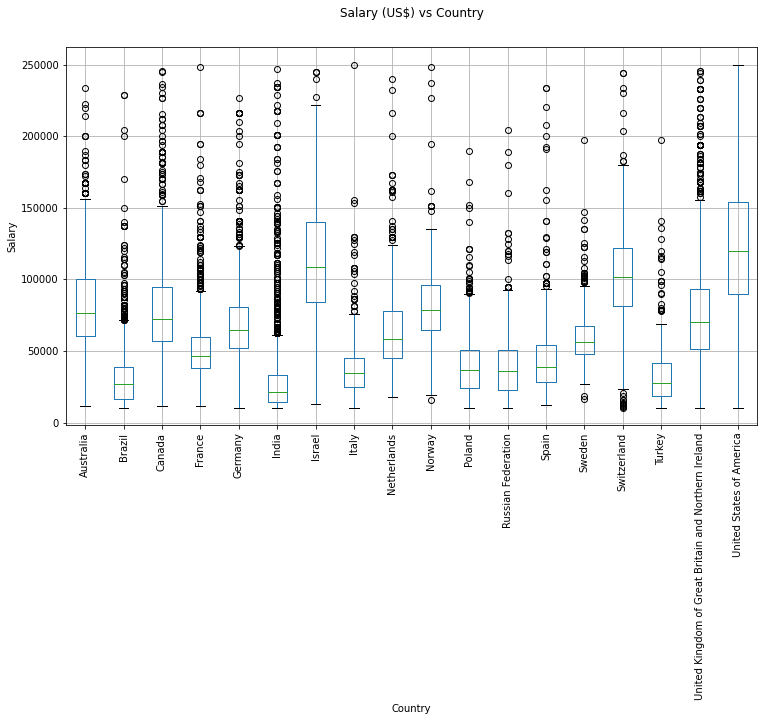

In [45]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title(' ')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [8]:
df=df[df["Salary"]>=10000]
df=df[df["Salary"]<=250000]
df=df[df["Country"]!='Other']

In [48]:
df["YearsCodePro"].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. ,  7. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [9]:
def clean_experience(x):
    if x=="More than 50 years":
        return 50
    if x=='Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro']=df['YearsCodePro'].apply(clean_experience)

In [11]:
df['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less Than a Bachelor’s'], dtype=object)

In [10]:
def clean_education(x):
    if x=="Bachelor's degree (B.A., B.S., B.Eng., etc.)":
        return 'Bachelor’s degree'
    if x=="Master's degree (M.A., M.S., M.Eng., MBA, etc":
        return 'Master’s degree'
    if "Professional degree" in x or "Other doctoral" in x:
        return 'Post grad'
    return 'Less Than a Bachelor’s'

df['EdLevel']=df['EdLevel'].apply(clean_education)

In [12]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
9,Sweden,Master’s degree,4.0,51552.0
11,Spain,Bachelor’s degree,5.0,46482.0
12,Germany,Master’s degree,6.0,77290.0
16,Turkey,Bachelor’s degree,2.0,17748.0
17,Canada,Bachelor’s degree,6.0,46135.0


In [13]:
#Transforming Data
# as edlevel , country and devtype are strings we convert them to numbers
from sklearn.preprocessing import LabelEncoder
le_education=LabelEncoder()
df['EdLevel']=le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 0, 3, 1])

In [14]:
#LabelEncoder for country
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

array([  56,  231,  508, ..., 1651, 1320, 1782])

In [41]:
'''le_language=LabelEncoder()
df['Language']=le_language.fit_transform(df['Language'])
df["Language"].unique()'''

array([7601, 4907, 8365, ...,   44, 8920, 9219])

In [15]:
#Splitting The Data
X=df.drop("Salary",axis=1)
y=df["Salary"]

In [16]:
#importing the libraries

from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [17]:
y_pred=linear_reg.predict(X)

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error=np.sqrt(mean_squared_error(y,y_pred))

In [19]:
error

41838.096750079996

In [20]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [21]:
y_pred=dec_tree_reg.predict(X)

In [22]:
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$31,267.18


In [23]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg=RandomForestRegressor(random_state=0)
random_forest_reg.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [24]:
y_pred=random_forest_reg.predict(X)

In [25]:
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$31,334.75


In [29]:
from sklearn.model_selection import GridSearchCV
max_depth=[None,2,4,6,8,10,12]
parameters={"max_depth":max_depth}

regressor=DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor,parameters,scoring="neg_mean_squared_error")
gs.fit(X,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [30]:
regressor=gs.best_estimator_
regressor.fit(X,y.values)
y_pred=regressor.predict(X)
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$32,049.21


In [40]:
X=np.array([["United States of America","Master’s degree",15]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [41]:
# language and devTpye
X[:,0]=le_country.transform(X[:,0])
X[:,1]=le_education.transform(X[:,1])
#X[:,2]=le_devtype.transform(X[:,2])
#X[:,3]=le_language.transform(X[:,3])
X=X.astype(float)
X

array([[17.,  2., 15.]])

In [42]:
y_pred=regressor.predict(X)
y_pred

C:\Users\BHAKTEE\anaconda3\envs\ml_mini_project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([148942.20512821])

In [43]:
import pickle

In [44]:
data={"model":regressor,"le_country":le_country,"le_education":le_education}
with open('saved_steps.pkl','wb') as file:
  pickle.dump(data,file)

In [45]:
with open('saved_steps.pkl','rb') as file:
  data=pickle.load(file)

regressor_loaded=data["model"]
le_country=data["le_country"]
le_education=data["le_education"]  

In [46]:
y_pred=regressor_loaded.predict(X)
y_pred

C:\Users\BHAKTEE\anaconda3\envs\ml_mini_project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([148942.20512821])

In [47]:
df["Country"]

9        13
11       12
12        4
16       15
17        2
         ..
83430    17
83432     2
83434    17
83436    17
83438     1
Name: Country, Length: 26230, dtype: int32